## Importación de librerías

In [17]:
# silence warnings
import warnings
warnings.filterwarnings("ignore")

# operating system
import os

# time calculation to track some processes
import time

#random selection of samples
import random

# numeric and matrix operations
import numpy as np
import pandas as pd

# loading ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# python core library for machine learning and data science
import sklearn
from sklearn import set_config
set_config(transform_output = "pandas")

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.cluster import KMeans

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
RANDOM_STATE = 175
CWD = os.getcwd()
PATH_FOLDER = "/content/drive/MyDrive/DataScience/DS Market/data_dsmarket"

print(CWD)
print(PATH_FOLDER)

/content
/content/drive/MyDrive/DataScience/DS Market/data_dsmarket


## Importación de datos

In [4]:
PATH_CAT_DPT = os.path.join(PATH_FOLDER, 'category_department1.csv')
cat_dpt_df = pd.read_csv(PATH_CAT_DPT, index_col=0)

In [5]:
PATH_PRECIOS = os.path.join(PATH_FOLDER, 'precios1.csv')
precios_df = pd.read_csv(PATH_PRECIOS, index_col=0)

In [6]:
PATH_TIENDAS = os.path.join(PATH_FOLDER, 'tiendas1.csv')
tiendas_df = pd.read_csv(PATH_TIENDAS, index_col=0)

In [7]:
PATH_CALENDARIO = os.path.join(PATH_FOLDER, 'calendario1.csv')
calendario_df = pd.read_csv(PATH_CALENDARIO, index_col=0)

In [8]:
PATH_VENTAS_SEM = os.path.join(PATH_FOLDER, 'ventas_sem1.csv')
ventas_sem_df = pd.read_csv(PATH_VENTAS_SEM, index_col=0)

## Exploratory Data Analysis (EDA)

## EDA ventas sem df

In [9]:
def report_df(df, verbose = True):
    '''
    Hace un report simple sobre el DataFrame suministrado.
    '''
    print(df.info(verbose = verbose))
    total_nulos = df.isnull().sum().sum()
    print()
    print(f"Tenemos un total de {total_nulos} nulos")

In [10]:
report_df(ventas_sem_df)

ventas_sem_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8506710 entries, 0 to 8506709
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   item        object 
 1   store_code  object 
 2   yearweek    int64  
 3   cantidad    int64  
 4   sell_price  float64
 5   monto       float64
dtypes: float64(2), int64(2), object(2)
memory usage: 454.3+ MB
None

Tenemos un total de 0 nulos


,item,store_code,yearweek,cantidad,sell_price,monto
0,ACCESORIES_1_001,BOS_1,201105,0,12.7414,0.0
1,ACCESORIES_1_001,BOS_1,201106,0,12.7414,0.0
2,ACCESORIES_1_001,BOS_1,201107,0,12.7414,0.0
3,ACCESORIES_1_001,BOS_1,201108,0,12.7414,0.0
4,ACCESORIES_1_001,BOS_1,201109,0,12.7414,0.0


In [11]:
# creamos una nueva variable 'week' que indica la semana dentro del año en el que se hizo la venta
ventas_sem_df['week'] = ventas_sem_df['yearweek'] % 100

In [13]:
# como en los primeros elementos se ve venta cero en todos los registros, revisamos una muestra aleatoria para validar que haya registros con venta != 0
ventas_sem_df.sample(20)

,item,store_code,yearweek,cantidad,sell_price,monto,week
727799,ACCESORIES_1_268,PHI_2,201412,36,0.6118,22.0248,12
5400633,SUPERMARKET_2_109,PHI_1,201135,0,3.5760,0.0000,35
3977380,HOME_&_GARDEN_2_330,NYC_3,201527,2,4.6500,9.3000,27
7393252,SUPERMARKET_3_425,PHI_3,201136,0,2.9760,0.0000,36
6629796,SUPERMARKET_3_152,BOS_3,201443,2,3.0000,6.0000,43
1045204,ACCESORIES_1_383,NYC_4,201221,0,3.9634,0.0000,21
773882,ACCESORIES_1_285,NYC_1,201507,2,14.4704,28.9408,7
5517642,SUPERMARKET_2_151,NYC_4,201336,8,2.2560,18.0480,36
6789239,SUPERMARKET_3_209,NYC_2,201204,0,4.7760,0.0000,4
5212902,SUPERMARKET_2_041,NYC_2,201217,0,4.7640,0.0000,17


In [14]:
ventas_sem_df.groupby(['item','week'])['monto'].sum()

item               week
ACCESORIES_1_001   0        230.8614
                   1        868.3570
                   2       1099.6972
                   3        868.1974
                   4        890.3286
                             ...    
SUPERMARKET_3_827  49       253.2000
                   50       232.8000
                   51       246.0000
                   52       181.2000
                   53         0.0000
Name: monto, Length: 164646, dtype: float64

In [15]:
ventas_sem_df['yearweek'].nunique()

279

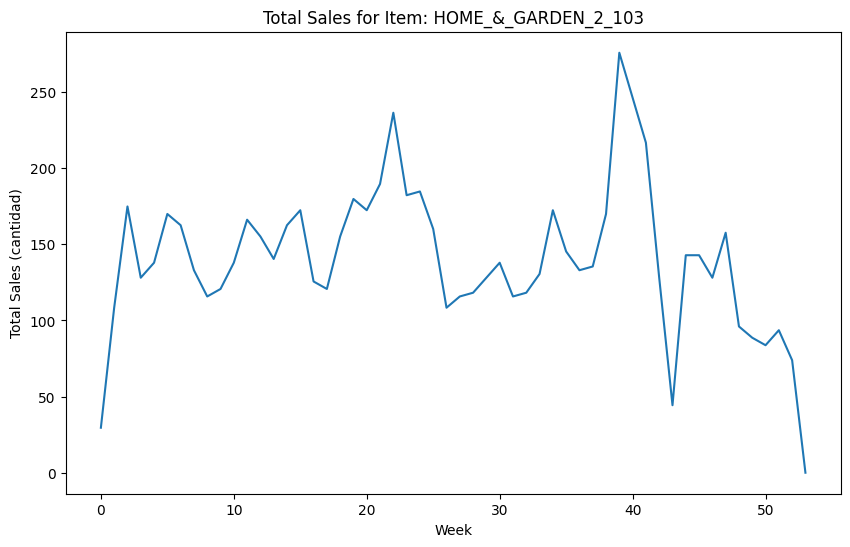

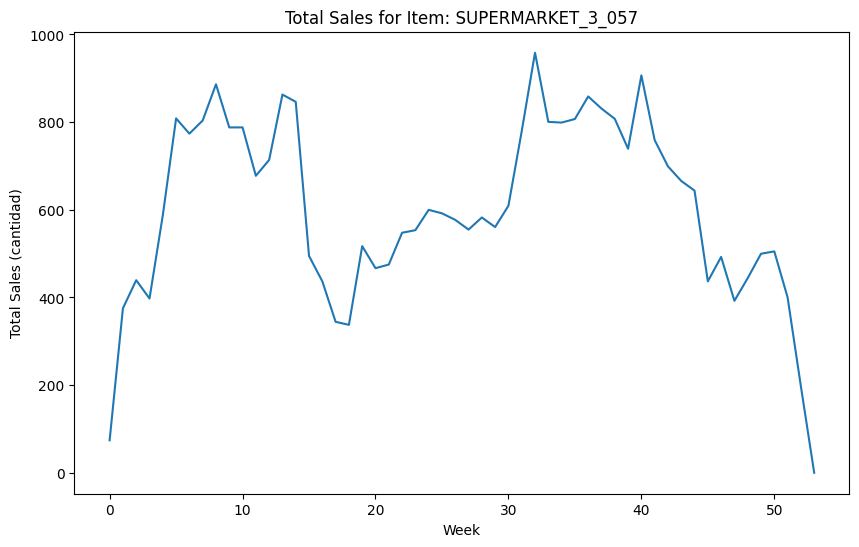

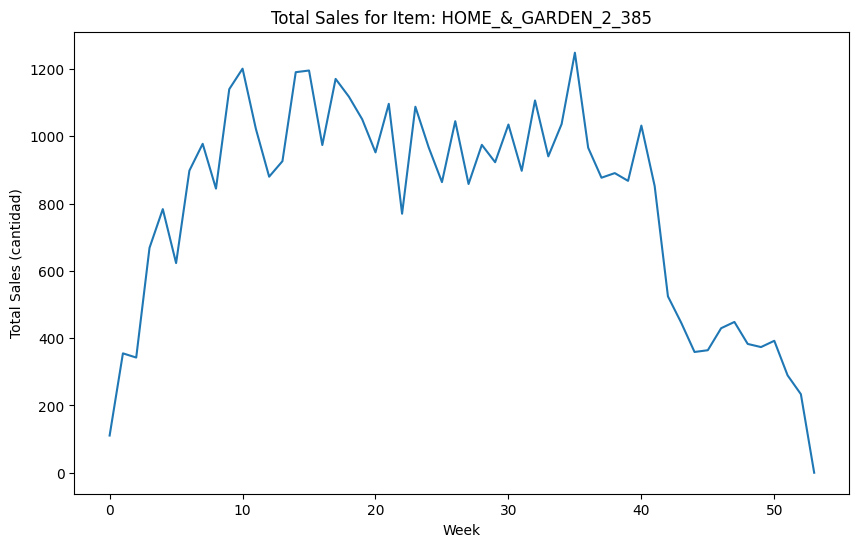

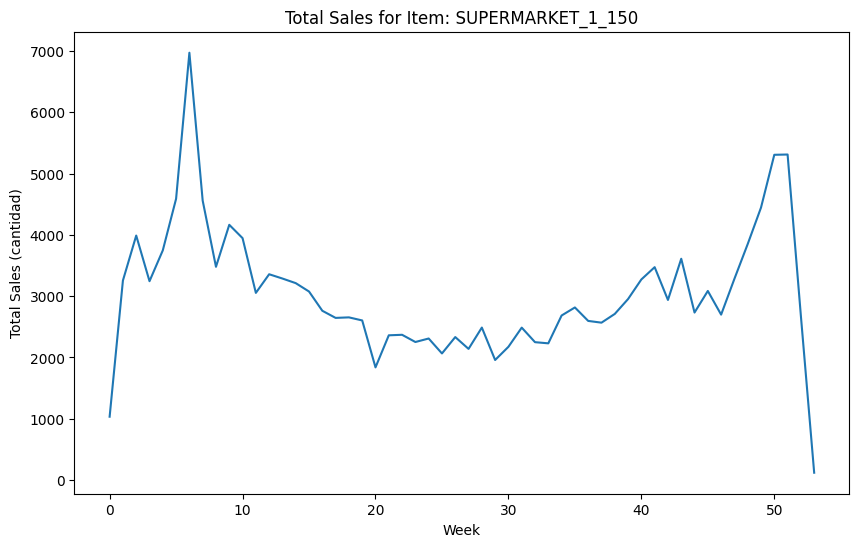

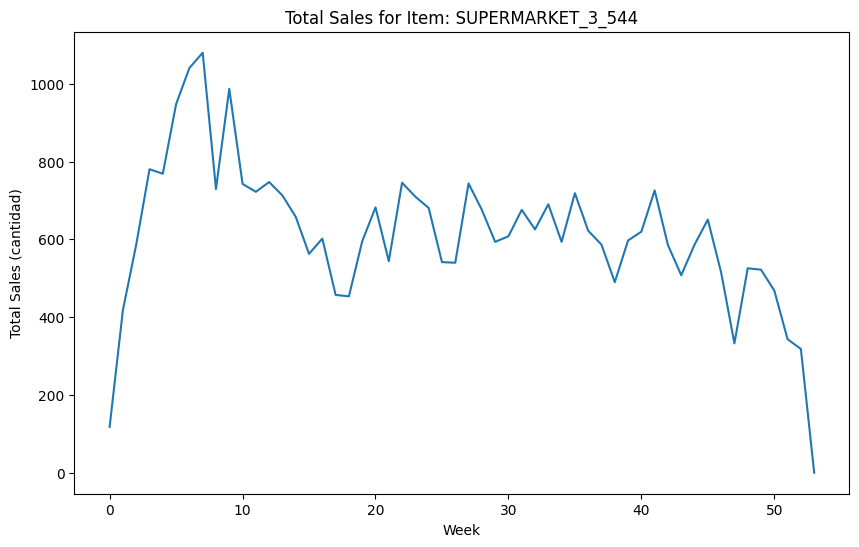

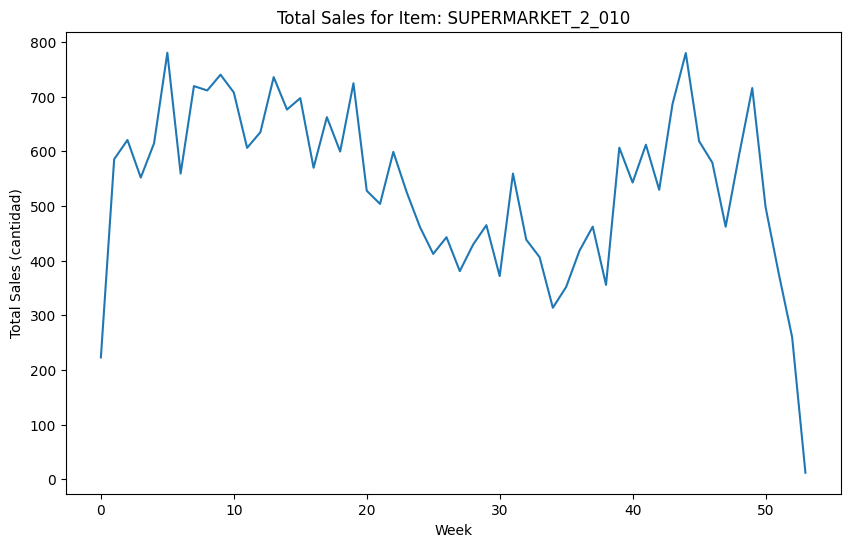

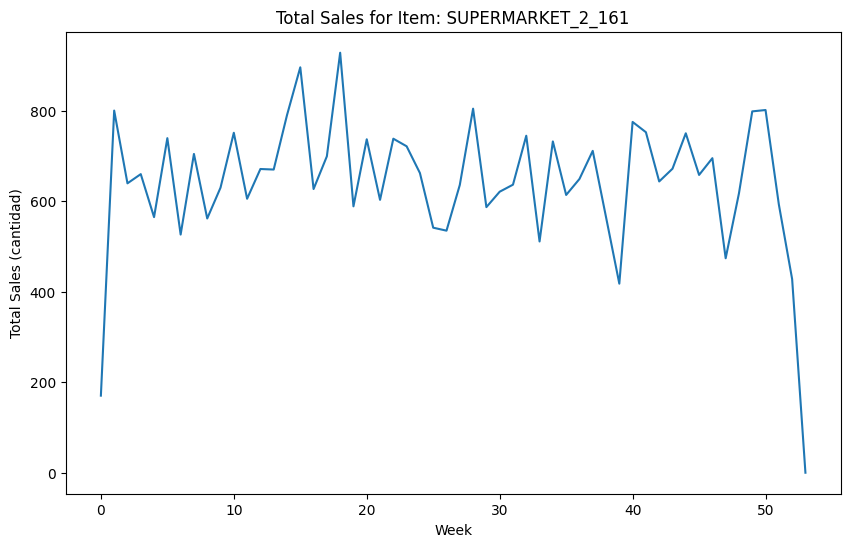

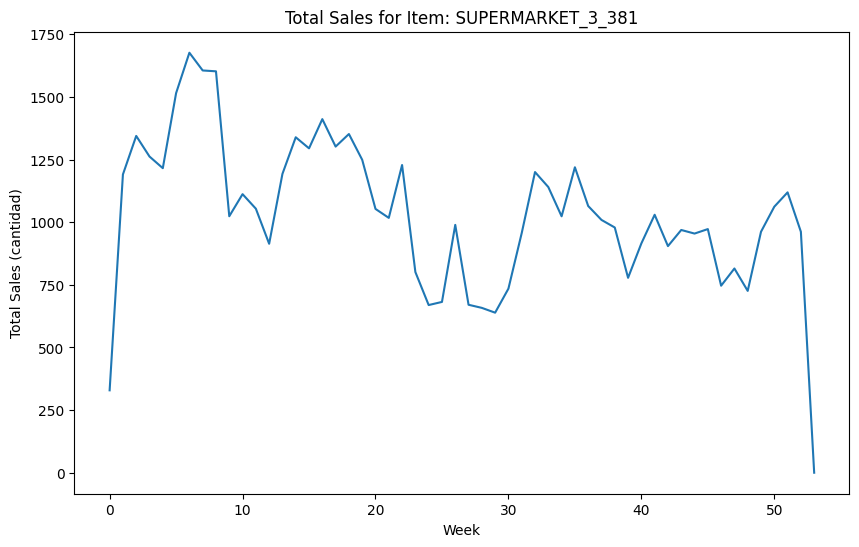

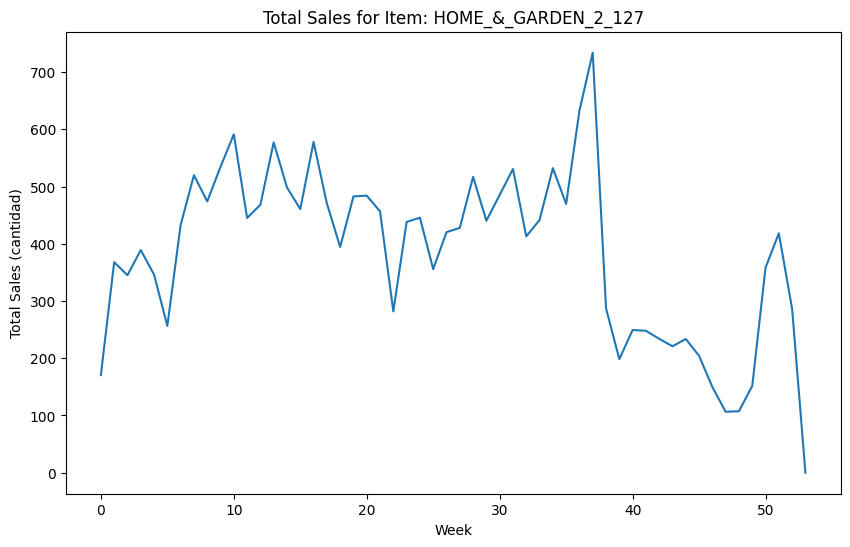

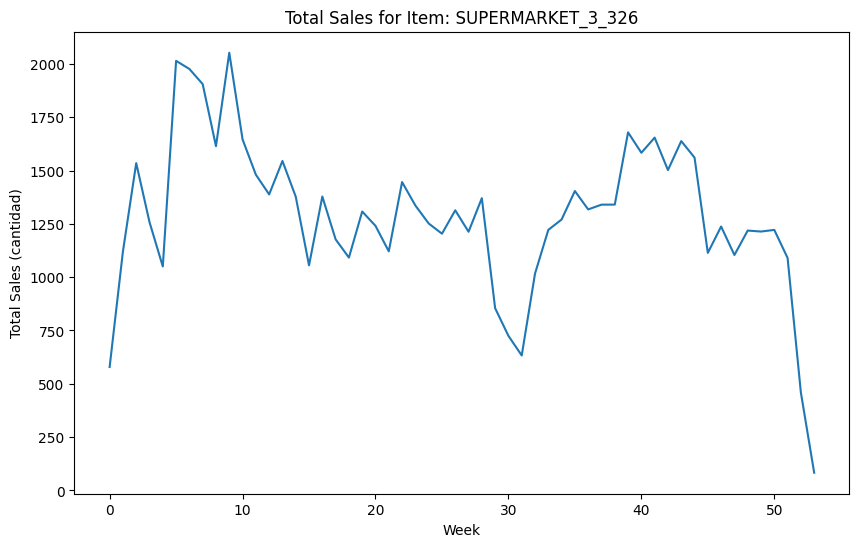

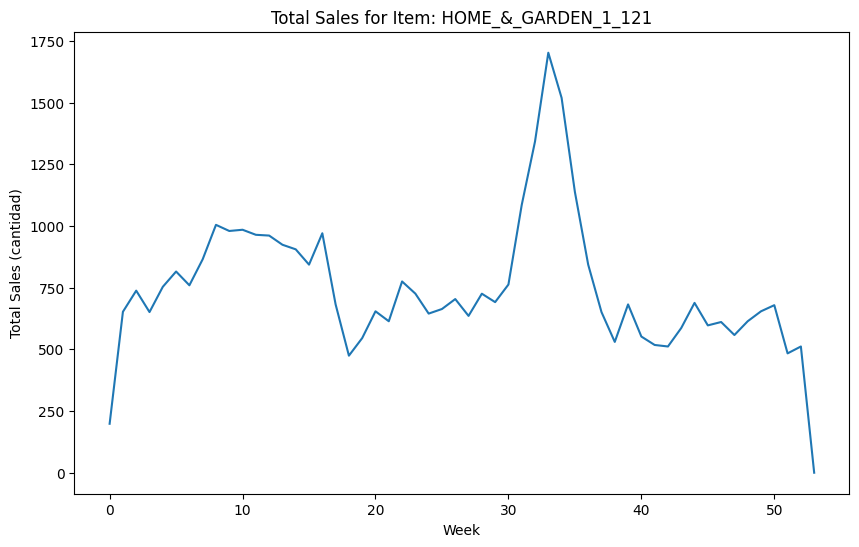

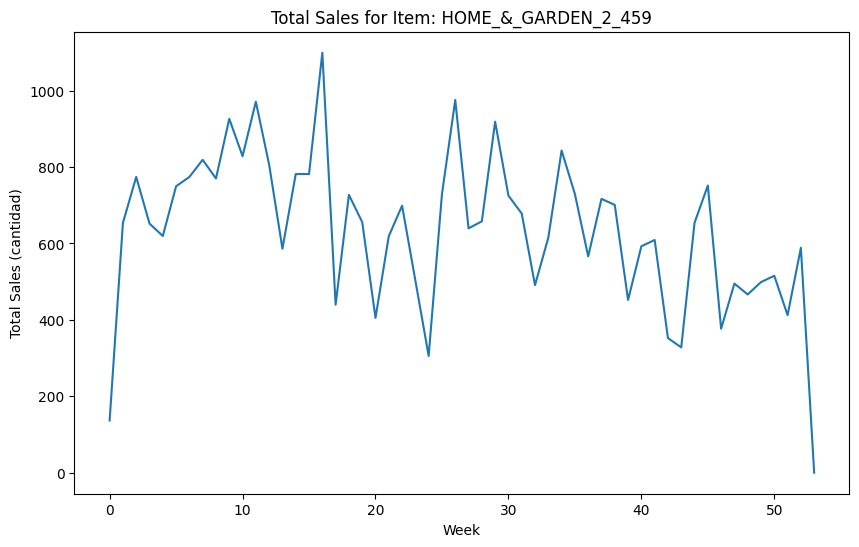

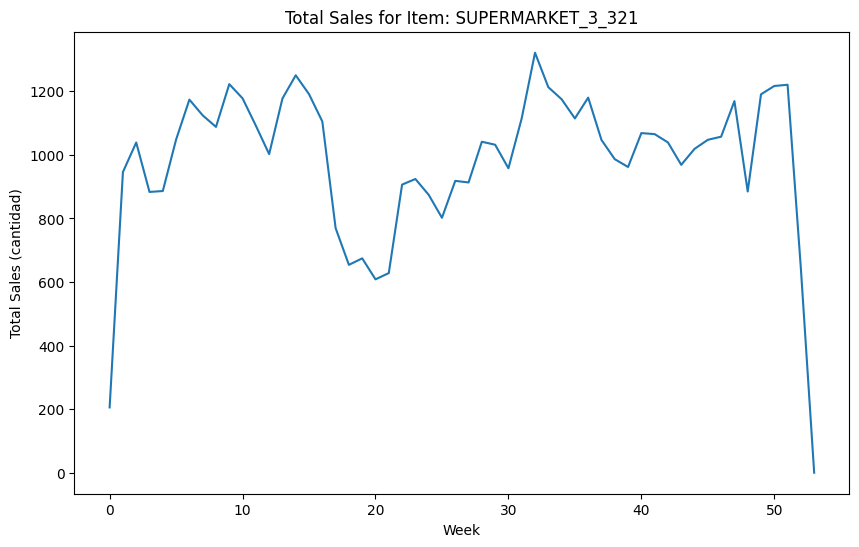

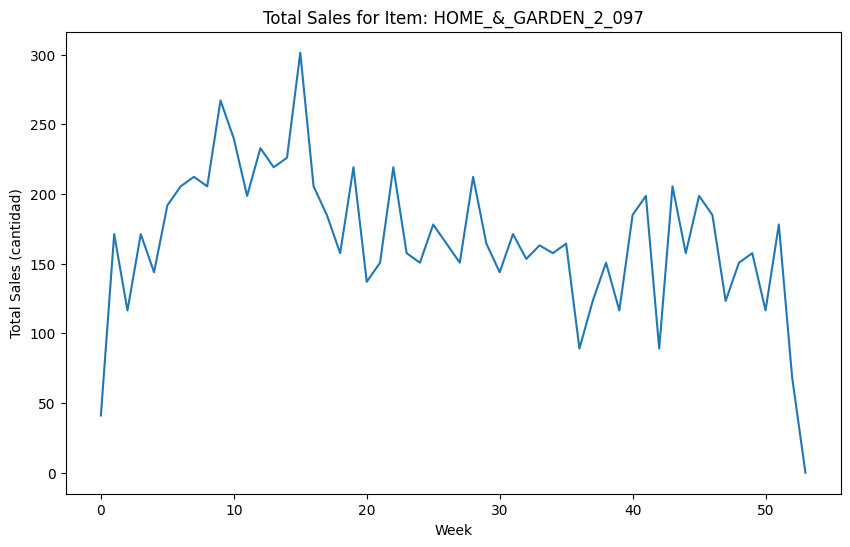

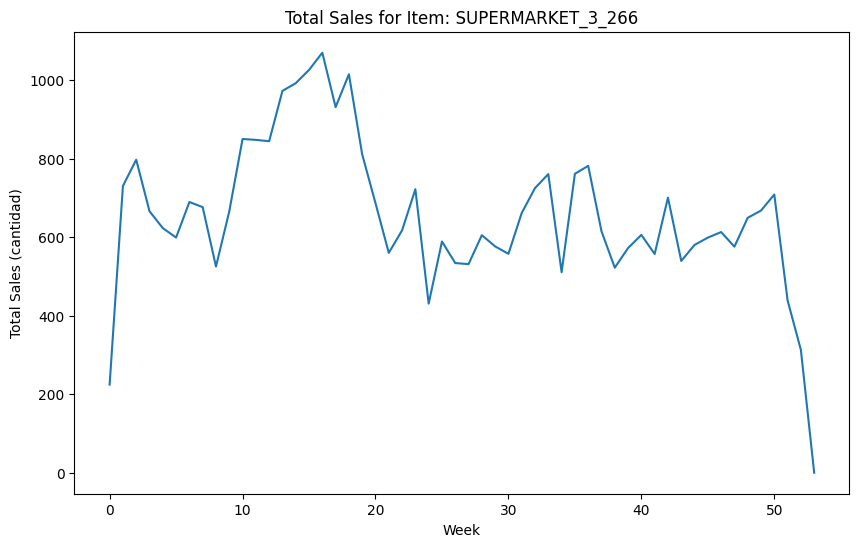

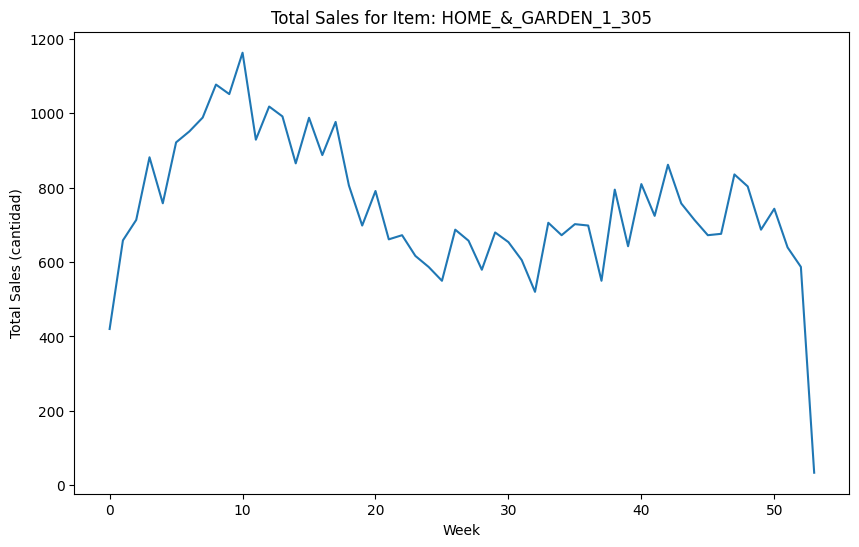

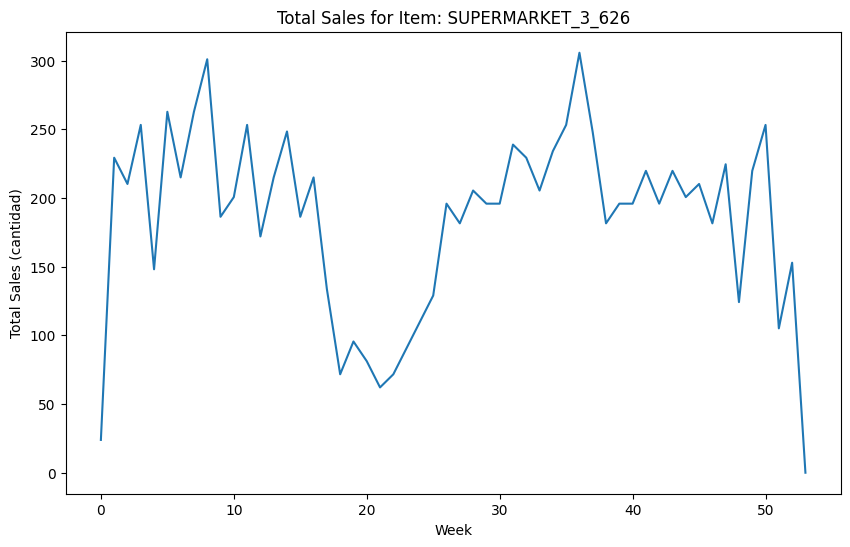

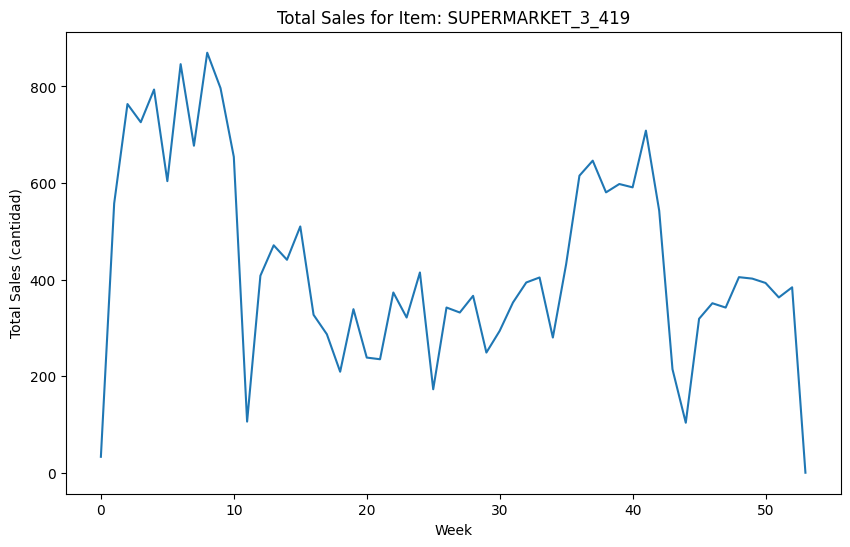

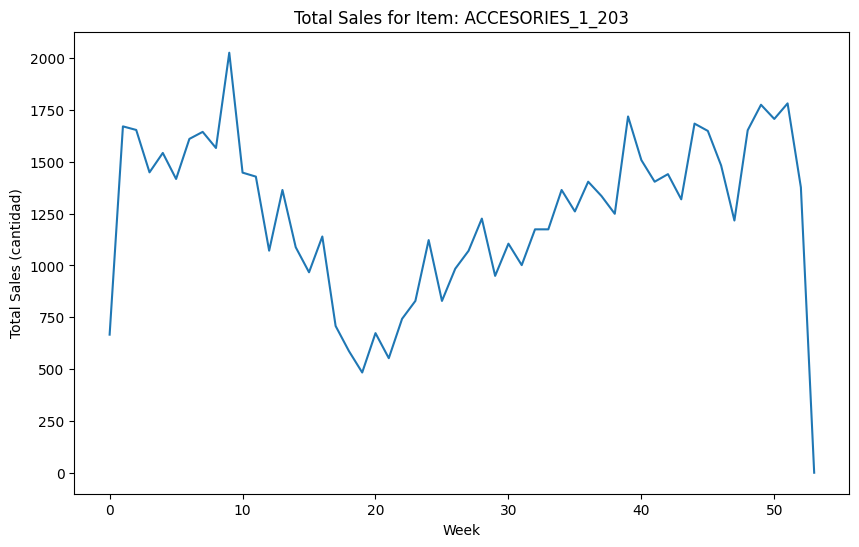

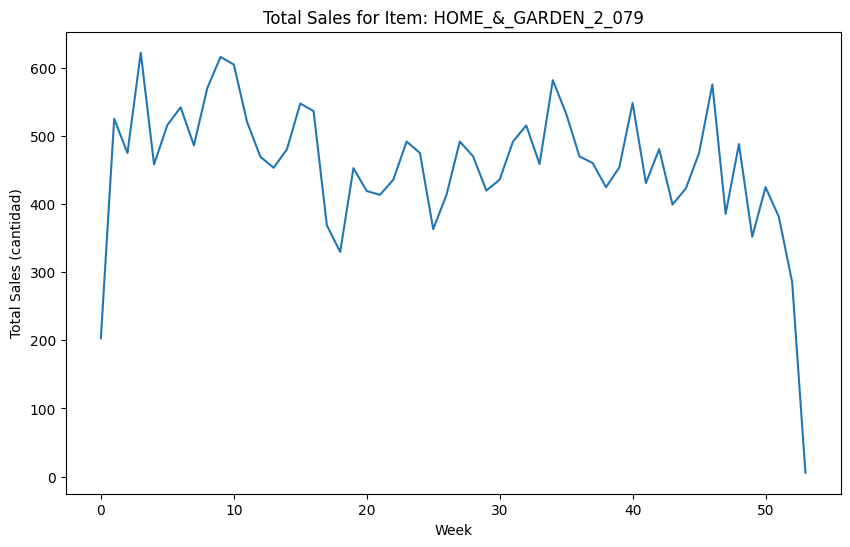

In [23]:
import matplotlib.pyplot as plt
import random as rd


grouped_data = ventas_sem_df.groupby(['item', 'week'])['monto'].sum()

grouped_df = grouped_data.reset_index()

unique_items = grouped_df['item'].unique()

#take a sample of 20 items
unique_items_selection = rd.sample(sorted(unique_items), 20)

for item in unique_items_selection:
    data = grouped_df[grouped_df['item'] == item]

    # Create a new figure and axis for each item
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the data for the current item
    ax.plot(data['week'], data['monto'])

    # Customize the plot
    ax.set_xlabel('Week')
    ax.set_ylabel('Total Sales (cantidad)')
    ax.set_title(f'Total Sales for Item: {item}')

    # Show the plot for the current item
    plt.show()

## EDA precios df

In [24]:
report_df(precios_df)

precios_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6721786 entries, 0 to 6965697
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   item        object 
 1   category    object 
 2   store_code  object 
 3   yearweek    int64  
 4   sell_price  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 307.7+ MB
None

Tenemos un total de 0 nulos


,item,category,store_code,yearweek,sell_price
0,ACCESORIES_1_001,ACCESORIES,NYC_1,201328,12.7414
1,ACCESORIES_1_001,ACCESORIES,NYC_1,201329,12.7414
2,ACCESORIES_1_001,ACCESORIES,NYC_1,201330,10.9858
3,ACCESORIES_1_001,ACCESORIES,NYC_1,201331,10.9858
4,ACCESORIES_1_001,ACCESORIES,NYC_1,201332,10.9858


## EDA cat_dpt df
'category' and 'department'

In [25]:
report_df(cat_dpt_df)

cat_dpt_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3049 entries, 0 to 3048
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   item        3049 non-null   object
 1   category    3049 non-null   object
 2   department  3049 non-null   object
dtypes: object(3)
memory usage: 95.3+ KB
None

Tenemos un total de 0 nulos


,item,category,department
0,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1
1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1
2,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1
3,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1
4,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1


## EDA tiendas df

In [26]:
report_df(tiendas_df)

tiendas_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   store       10 non-null     object
 1   store_code  10 non-null     object
 2   region      10 non-null     object
dtypes: object(3)
memory usage: 320.0+ bytes
None

Tenemos un total de 0 nulos


,store,store_code,region
0,Greenwich_Village,NYC_1,New York
1,Harlem,NYC_2,New York
2,Tribeca,NYC_3,New York
3,Brooklyn,NYC_4,New York
4,South_End,BOS_1,Boston


## EDA calendario df

In [27]:
report_df(calendario_df)
calendario_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1913 entries, 0 to 1912
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         1913 non-null   object
 1   weekday      1913 non-null   object
 2   weekday_int  1913 non-null   int64 
 3   d            1913 non-null   object
 4   event        26 non-null     object
 5   yearweek     1913 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 104.6+ KB
None

Tenemos un total de 1887 nulos


,date,weekday,weekday_int,d,event,yearweek
0,2011-01-29,Saturday,1,d_1,NaN,201105
1,2011-01-30,Sunday,2,d_2,NaN,201105
2,2011-01-31,Monday,3,d_3,NaN,201105
3,2011-02-01,Tuesday,4,d_4,NaN,201105
4,2011-02-02,Wednesday,5,d_5,NaN,201105


In [28]:
calendario_df['date'].min()

'2011-01-29'

In [29]:
calendario_df['date'].max()

'2016-04-24'

In [30]:
#se agregarán al calendario algunas variables que pueden sernos útiles

# La parte de "semana" del yearweek
calendario_df['week'] = calendario_df['yearweek'] % 100
calendario_df.head()



,date,weekday,weekday_int,d,event,yearweek,week
0,2011-01-29,Saturday,1,d_1,NaN,201105,5
1,2011-01-30,Sunday,2,d_2,NaN,201105,5
2,2011-01-31,Monday,3,d_3,NaN,201105,5
3,2011-02-01,Tuesday,4,d_4,NaN,201105,5
4,2011-02-02,Wednesday,5,d_5,NaN,201105,5


In [31]:
calendario_df['week'].min()

0

In [32]:
calendario_df['week'].max()

53

In [33]:
# el mes correspondiente a la fecha

calendario_df['month'] = pd.DatetimeIndex(calendario_df['date']).month
calendario_df.head()

,date,weekday,weekday_int,d,event,yearweek,week,month
0,2011-01-29,Saturday,1,d_1,NaN,201105,5,1
1,2011-01-30,Sunday,2,d_2,NaN,201105,5,1
2,2011-01-31,Monday,3,d_3,NaN,201105,5,1
3,2011-02-01,Tuesday,4,d_4,NaN,201105,5,2
4,2011-02-02,Wednesday,5,d_5,NaN,201105,5,2


In [34]:
# Crear variables booleanas que indiquen cuando en una semana cae un evento específico
calendario_df = pd.get_dummies(calendario_df, columns=['event'])

In [35]:
calendario_df.head()

,date,weekday,weekday_int,d,yearweek,week,month,event_Easter,event_NewYear,event_Ramadan starts,event_SuperBowl,event_Thanksgiving
0,2011-01-29,Saturday,1,d_1,201105,5,1,0,0,0,0,0
1,2011-01-30,Sunday,2,d_2,201105,5,1,0,0,0,0,0
2,2011-01-31,Monday,3,d_3,201105,5,1,0,0,0,0,0
3,2011-02-01,Tuesday,4,d_4,201105,5,2,0,0,0,0,0
4,2011-02-02,Wednesday,5,d_5,201105,5,2,0,0,0,0,0


In [36]:
calendario_df[(calendario_df['event_Easter']==1)]

,date,weekday,weekday_int,d,yearweek,week,month,event_Easter,event_NewYear,event_Ramadan starts,event_SuperBowl,event_Thanksgiving
435,2012-04-08,Sunday,2,d_436,201214,14,4,1,0,0,0,0
792,2013-03-31,Sunday,2,d_793,201313,13,3,1,0,0,0,0
1177,2014-04-20,Sunday,2,d_1178,201416,16,4,1,0,0,0,0
1527,2015-04-05,Sunday,2,d_1528,201514,14,4,1,0,0,0,0
1884,2016-03-27,Sunday,2,d_1885,201613,13,3,1,0,0,0,0


Se creará una tabla que solo contenga información de las semanas y que será la utilizada para hacer el merge con ventas_sem_df

In [45]:
aggregated_week_df = calendario_df.groupby('yearweek').agg(
    Easter_week = ('event_Easter', 'sum'),
    NewYear_week = ('event_NewYear', 'sum'),
    Ramadan_week = ('event_Ramadan starts', 'sum'),
    SuperBowl_week = ('event_SuperBowl', 'sum'),
    Thanksgiving_week = ('event_Thanksgiving', 'sum'),
    month_week = ('month', 'median')
)


In [46]:
aggregated_week_df[(aggregated_week_df['Thanksgiving_week']==1)]


,Easter_week,NewYear_week,Ramadan_week,SuperBowl_week,Thanksgiving_week,month_week,current_week
yearweek,,,,,,,
201147,0,0,0,0,1,11.0,47
201246,0,0,0,0,1,11.0,46
201347,0,0,0,0,1,11.0,47
201447,0,0,0,0,1,11.0,47
201547,0,0,0,0,1,11.0,47


In [47]:
aggregated_week_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279 entries, 201105 to 201617
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Easter_week        279 non-null    uint8  
 1   NewYear_week       279 non-null    uint8  
 2   Ramadan_week       279 non-null    uint8  
 3   SuperBowl_week     279 non-null    uint8  
 4   Thanksgiving_week  279 non-null    uint8  
 5   month_week         279 non-null    float64
 6   current_week       279 non-null    int64  
dtypes: float64(1), int64(1), uint8(5)
memory usage: 7.9 KB


In [48]:
aggregated_week_df['month_week'] = aggregated_week_df['month_week'].astype('uint8')

In [49]:
aggregated_week_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279 entries, 201105 to 201617
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Easter_week        279 non-null    uint8
 1   NewYear_week       279 non-null    uint8
 2   Ramadan_week       279 non-null    uint8
 3   SuperBowl_week     279 non-null    uint8
 4   Thanksgiving_week  279 non-null    uint8
 5   month_week         279 non-null    uint8
 6   current_week       279 non-null    int64
dtypes: int64(1), uint8(6)
memory usage: 6.0 KB


In [50]:
aggregated_week_df.sample(10)

,Easter_week,NewYear_week,Ramadan_week,SuperBowl_week,Thanksgiving_week,month_week,current_week
yearweek,,,,,,,
201107,0,0,0,0,0,2,7
201121,0,0,0,0,0,5,21
201220,0,0,0,0,0,5,20
201530,0,0,0,0,0,7,30
201417,0,0,0,0,0,4,17
201412,0,0,0,0,0,3,12
201227,0,0,0,0,0,7,27
201212,0,0,0,0,0,3,12
201435,0,0,0,0,0,9,35


## Join de tablas
Para generar una única tabla con todos los datos que pueden ser relevantes para el estudio

A fin de poder hacer un estudio completo del data set, incluiremos algunas variables de otros data sets que nos pueden ser útiles al momento de analizar el comportamiento de los items

### Datos cat_dpt_df

In [51]:
cat_dpt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3049 entries, 0 to 3048
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   item        3049 non-null   object
 1   category    3049 non-null   object
 2   department  3049 non-null   object
dtypes: object(3)
memory usage: 95.3+ KB


In [52]:
#Se agregan la categoría y el departamento correspondientes al item
ventas_sem_df = ventas_sem_df.merge(cat_dpt_df[['item','category','department']], on = 'item', how = 'left')

In [53]:
ventas_sem_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8506710 entries, 0 to 8506709
Data columns (total 9 columns):
 #   Column      Dtype  
---  ------      -----  
 0   item        object 
 1   store_code  object 
 2   yearweek    int64  
 3   cantidad    int64  
 4   sell_price  float64
 5   monto       float64
 6   week        int64  
 7   category    object 
 8   department  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 649.0+ MB


### Datos tiendas_df

In [54]:
tiendas_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   store       10 non-null     object
 1   store_code  10 non-null     object
 2   region      10 non-null     object
dtypes: object(3)
memory usage: 320.0+ bytes


In [55]:
# Se agrega la región, la variable 'store' no genera información adicional relevante
ventas_sem_df = ventas_sem_df.merge(tiendas_df[['store_code','region']], on = 'store_code', how = 'left')

In [56]:
ventas_sem_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8506710 entries, 0 to 8506709
Data columns (total 10 columns):
 #   Column      Dtype  
---  ------      -----  
 0   item        object 
 1   store_code  object 
 2   yearweek    int64  
 3   cantidad    int64  
 4   sell_price  float64
 5   monto       float64
 6   week        int64  
 7   category    object 
 8   department  object 
 9   region      object 
dtypes: float64(2), int64(3), object(5)
memory usage: 713.9+ MB


### Datos calendario_df

Para agregar los datos que nos interesan del calendario se utilizará el dataframe aggregated_week_df, que contiene toda la información que nos interesa agrupada por 'yearweek' tal y como se encuentra en ventas_sem_df

In [57]:
aggregated_week_df

,Easter_week,NewYear_week,Ramadan_week,SuperBowl_week,Thanksgiving_week,month_week,current_week
yearweek,,,,,,,
201105,0,0,0,0,0,2,5
201106,0,0,0,1,0,2,6
201107,0,0,0,0,0,2,7
201108,0,0,0,0,0,2,8
201109,0,0,0,0,0,3,9
...,...,...,...,...,...,...,...
201613,1,0,0,0,0,3,13
201614,0,0,0,0,0,4,14
201615,0,0,0,0,0,4,15


In [58]:
# Lista de columnas a agregar
list_col = list(aggregated_week_df.columns)
list_col

['Easter_week',
 'NewYear_week',
 'Ramadan_week',
 'SuperBowl_week',
 'Thanksgiving_week',
 'month_week',
 'current_week']

In [59]:
list_col = list_col + ['yearweek']
list_col

['Easter_week',
 'NewYear_week',
 'Ramadan_week',
 'SuperBowl_week',
 'Thanksgiving_week',
 'month_week',
 'current_week',
 'yearweek']

In [60]:
ventas_sem_df = pd.merge(ventas_sem_df, aggregated_week_df, on = 'yearweek', how = 'left')


ventas_sem_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8506710 entries, 0 to 8506709
Data columns (total 17 columns):
 #   Column             Dtype  
---  ------             -----  
 0   item               object 
 1   store_code         object 
 2   yearweek           int64  
 3   cantidad           int64  
 4   sell_price         float64
 5   monto              float64
 6   week               int64  
 7   category           object 
 8   department         object 
 9   region             object 
 10  Easter_week        uint8  
 11  NewYear_week       uint8  
 12  Ramadan_week       uint8  
 13  SuperBowl_week     uint8  
 14  Thanksgiving_week  uint8  
 15  month_week         uint8  
 16  current_week       int64  
dtypes: float64(2), int64(4), object(5), uint8(6)
memory usage: 827.5+ MB


In [61]:
ventas_sem_df.sample(20)

,item,store_code,yearweek,cantidad,sell_price,monto,week,category,department,region,Easter_week,NewYear_week,Ramadan_week,SuperBowl_week,Thanksgiving_week,month_week,current_week
5378639,SUPERMARKET_2_101,PHI_2,201228,7,7.1760,50.2320,28,SUPERMARKET,SUPERMARKET_2,Philadelphia,0,0,1,0,0,7,28
3704652,HOME_&_GARDEN_2_232,PHI_2,201241,3,5.5875,16.7625,41,HOME_&_GARDEN,HOME_&_GARDEN_2,Philadelphia,0,0,0,0,0,10,41
79784,ACCESORIES_1_029,NYC_3,201608,9,11.9434,107.4906,8,ACCESORIES,ACCESORIES_1,New York,0,0,0,0,0,2,8
8074436,SUPERMARKET_3_670,BOS_1,201421,1,2.3760,2.3760,21,SUPERMARKET,SUPERMARKET_3,Boston,0,0,0,0,0,5,21
2574674,HOME_&_GARDEN_1_365,PHI_2,201213,4,4.9625,19.8500,13,HOME_&_GARDEN,HOME_&_GARDEN_1,Philadelphia,0,0,0,0,0,4,13
2409457,HOME_&_GARDEN_1_305,NYC_4,201118,0,3.7125,0.0000,18,HOME_&_GARDEN,HOME_&_GARDEN_1,New York,0,0,0,0,0,5,18
2388906,HOME_&_GARDEN_1_298,BOS_3,201306,3,4.4250,13.2750,6,HOME_&_GARDEN,HOME_&_GARDEN_1,Boston,0,0,0,0,0,2,6
2134928,HOME_&_GARDEN_1_205,BOS_3,201125,0,7.4625,0.0000,25,HOME_&_GARDEN,HOME_&_GARDEN_1,Boston,0,0,0,0,0,6,25
321709,ACCESORIES_1_120,NYC_1,201127,0,14.6034,0.0000,27,ACCESORIES,ACCESORIES_1,New York,0,0,0,0,0,7,27
1968216,HOME_&_GARDEN_1_145,NYC_2,201348,0,2.4750,0.0000,48,HOME_&_GARDEN,HOME_&_GARDEN_1,New York,0,0,0,0,0,12,48


## Creacion de transformers